

## Exercise 3  Embeddings 2

The goal of this exercise is to learn to use SpaCy embedding on a document.

1. Compute the embedding of all the words in this sentence. The language model considered is `en_core_web_md`

``` console
"laptop computer coffee tea water liquid dog cat kitty"
```

2. Plot the pairwise cosine distances between all the words in a HeatMap.

![alt text][logo]

[logo]: w3day05ex1_plot.png "Plot"

- https://medium.com/datadriveninvestor/cosine-similarity-cosine-distance-6571387f9bf8


(300,)
[-0.17209414  0.03873266  0.10109967 -0.17875557 -0.17240189  0.18638165
 -0.38768446 -0.25438505  0.21672376  1.2832266  -0.37055573 -0.02357878
 -0.4289711  -0.22883208 -0.20272487 -0.07234111 -0.10221711  1.80136
 -0.11015279 -0.02811855]
ipykernel_launcher:29: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.


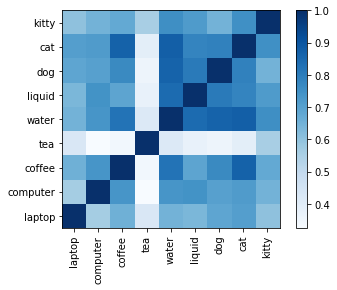

In [52]:
import spacy
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances

# 1.
text = "laptop computer coffee tea water liquid dog cat kitty"
nlp = spacy.load("en_core_web_md")
doc = nlp(text)

# testing
print(doc.vector.shape)
print(doc.vector[:20])

# 2.
words = [word.text for word in doc]

cos_sims = []

# 1 - cosine_similarity = cosine_distance
# cosine_similarity = cos(delta) = a * b / |a| * |b|  

nlp = spacy.load("en_core_web_sm")
for word in words:
    first = []
    for word_two in words[::-1]:
        doc = nlp(word)
        doc_two = nlp(word_two)
        first.append(doc.similarity(doc_two))
    cos_sims.append(first)


plt.xticks(ticks=np.arange(len(words)),labels=words, rotation=90)
plt.yticks(ticks=np.arange(len(words)),labels=words[::-1])

# save this plot inside a variable called hm
hm=plt.imshow(cos_sims, cmap='Blues', interpolation="nearest")
# pass this heatmap object into plt.colorbar method.
plt.colorbar(hm)
